In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/content/drive/MyDrive/TSFN GHG Emission/Total Emission/Emissions_Totals_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')

In [4]:
df.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Source Code,Source,Unit,Value,Flag,Note
0,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1961,1961,3050,FAO TIER 1,kilotonnes,0.8762,E,NaN
1,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1962,1962,3050,FAO TIER 1,kilotonnes,0.8829,E,NaN
2,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1963,1963,3050,FAO TIER 1,kilotonnes,0.8236,E,NaN
3,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1964,1964,3050,FAO TIER 1,kilotonnes,0.8882,E,NaN
4,2,'004,Afghanistan,5064,Crop Residues,7234,Direct emissions (N2O),1965,1965,3050,FAO TIER 1,kilotonnes,0.8978,E,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024987 entries, 0 to 2024986
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Area Code        int64  
 1   Area Code (M49)  object 
 2   Area             object 
 3   Item Code        int64  
 4   Item             object 
 5   Element Code     int64  
 6   Element          object 
 7   Year Code        int64  
 8   Year             int64  
 9   Source Code      int64  
 10  Source           object 
 11  Unit             object 
 12  Value            float64
 13  Flag             object 
 14  Note             float64
dtypes: float64(2), int64(6), object(7)
memory usage: 231.7+ MB


In [6]:
df.isnull().sum()

Area Code                0
Area Code (M49)          0
Area                     0
Item Code                0
Item                     0
Element Code             0
Element                  0
Year Code                0
Year                     0
Source Code              0
Source                   0
Unit                     0
Value                    0
Flag                     0
Note               2024987
dtype: int64

In [7]:
filtered_df = df.drop(columns=['Area Code','Area Code (M49)','Item Code','Element Code','Year Code','Source Code','Source','Flag','Note'])

In [8]:
unique_unit = df['Unit'].unique()
print(unique_unit)

['kilotonnes']


In [9]:
unique_items = df['Item'].unique()
print(unique_items)

['Crop Residues' 'Rice Cultivation' 'Burning - Crop residues'
 'Enteric Fermentation' 'Manure Management' 'Manure left on Pasture'
 'Manure applied to Soils' 'Synthetic Fertilizers' 'Drained organic soils'
 'Drained organic soils (CO2)' 'Drained organic soils (N2O)' 'Forestland'
 'Net Forest conversion' 'Savanna fires' 'Fires in organic soils'
 'Forest fires' 'Fires in humid tropical forests'
 'Agrifood Systems Waste Disposal' 'Fertilizers Manufacturing'
 'On-farm Electricity Use' 'Food Retail' 'Food Household Consumption'
 'Food Transport' 'Energy' 'IPPU' 'Waste' 'Other' 'Farm gate'
 'Land Use change' 'Emissions on agricultural land'
 'Pre- and Post- Production' 'Agrifood systems' 'IPCC Agriculture'
 'Agricultural Soils' 'LULUCF' 'AFOLU' 'All sectors with LULUCF'
 'All sectors without LULUCF' 'On-farm energy use'
 'Pesticides Manufacturing' 'Food Processing' 'Food Packaging'
 'On-farm Heat Use' 'International bunkers']


In [10]:
unique_areas = df['Area'].unique()
print(unique_areas)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' '

In [11]:
selected_items = ['Rice Cultivation', 'Crop Residues', 'Burning - Crop residues','Synthetic Fertilizers', 'Fertilizers Manufacturing', 'On-farm Electricity Use', 'Food Retail', 'Food Household Consumption', 'Food Transport', 'Waste','On-farm energy use', 'Pesticides Manufacturing', 'Food Processing', 'Food Packaging', 'On-farm Heat Use','Drained organic soils','Agrifood Systems Waste Disposal']

selected_area = ['Australia and New Zealand', 'Caribbean', 'Central America', 'Central Asia',
    'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'Melanesia', 'Micronesia',
    'Middle Africa', 'Northern Africa', 'Northern America', 'Northern Europe',
    'Polynesia', 'South America', 'South-eastern Asia', 'Southern Africa',
    'Southern Asia', 'Southern Europe', 'Western Africa', 'Western Asia', 'Western Europe',
    'Africa', 'Americas', 'Asia', 'Europe', 'Oceania', 'World', 'Annex I countries',
    'European Union (27)', 'Land Locked Developing Countries', 'Least Developed Countries',
    'Low Income Food Deficit Countries', 'Net Food Importing Developing Countries',
    'Non-Annex I countries', 'OECD', 'Small Island Developing States']

selected_gases = ['Emissions (CO2eq) (AR5)']

filtered_df = filtered_df[filtered_df['Item'].isin(selected_items)]
filtered_df = filtered_df[~filtered_df['Area'].isin(selected_area)]
filtered_df = filtered_df[filtered_df['Element'].isin(selected_gases)]
filtered_df = filtered_df[filtered_df['Year'] >= 1990]
filtered_df = filtered_df[filtered_df['Year'] <= 2020]

filtered_df = filtered_df.reset_index(drop=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91998 entries, 0 to 91997
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     91998 non-null  object 
 1   Item     91998 non-null  object 
 2   Element  91998 non-null  object 
 3   Year     91998 non-null  int64  
 4   Unit     91998 non-null  object 
 5   Value    91998 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.2+ MB


In [12]:
unique_items = filtered_df['Item'].unique()
print(unique_items)

['Crop Residues' 'Rice Cultivation' 'Burning - Crop residues'
 'Synthetic Fertilizers' 'Drained organic soils'
 'Agrifood Systems Waste Disposal' 'Fertilizers Manufacturing'
 'On-farm Electricity Use' 'Food Retail' 'Food Household Consumption'
 'Food Transport' 'Waste' 'On-farm energy use' 'Pesticides Manufacturing'
 'Food Processing' 'Food Packaging' 'On-farm Heat Use']


In [13]:
unique_gases = filtered_df['Element'].unique()
print(unique_gases)

['Emissions (CO2eq) (AR5)']


In [14]:
filtered_df.head()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1990,kilotonnes,205.6077
1,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1991,kilotonnes,209.4971
2,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1992,kilotonnes,196.5341
3,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1993,kilotonnes,230.8175
4,Afghanistan,Crop Residues,Emissions (CO2eq) (AR5),1994,kilotonnes,242.0494


In [15]:
filtered_df.to_csv('TotalEmission_world.csv', index=False)

In [16]:
asia_countries = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan',
    'Brunei Darussalam', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia',
    'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Jordan',
    'Kazakhstan', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic",
    'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
    'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Republic of Korea',
    'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic',
    'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan',
    'United Arab Emirates', 'Uzbekistan', 'Viet Nam', 'Yemen',
]

asia_df = filtered_df[filtered_df['Area'].isin(asia_countries)]
asia_df = asia_df.reset_index(drop=True)
asia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19782 entries, 0 to 19781
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     19782 non-null  object 
 1   Item     19782 non-null  object 
 2   Element  19782 non-null  object 
 3   Year     19782 non-null  int64  
 4   Unit     19782 non-null  object 
 5   Value    19782 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 927.4+ KB


In [17]:
area = asia_df['Area'].unique()
print(area)

['Afghanistan' 'Armenia' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Bhutan'
 'Brunei Darussalam' 'Cambodia' 'China' 'Georgia' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Israel' 'Japan' 'Jordan'
 'Kazakhstan' 'Kuwait' 'Kyrgyzstan' "Lao People's Democratic Republic"
 'Lebanon' 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar' 'Nepal' 'Oman'
 'Pakistan' 'Palestine' 'Philippines' 'Qatar' 'Republic of Korea'
 'Saudi Arabia' 'Singapore' 'Sri Lanka' 'Syrian Arab Republic'
 'Tajikistan' 'Thailand' 'Timor-Leste' 'Turkmenistan'
 'United Arab Emirates' 'Uzbekistan' 'Viet Nam' 'Yemen']


In [18]:
asia_df.to_csv('TotalEmission_Asia.csv', index=False)

##Highest CO2eq item for World



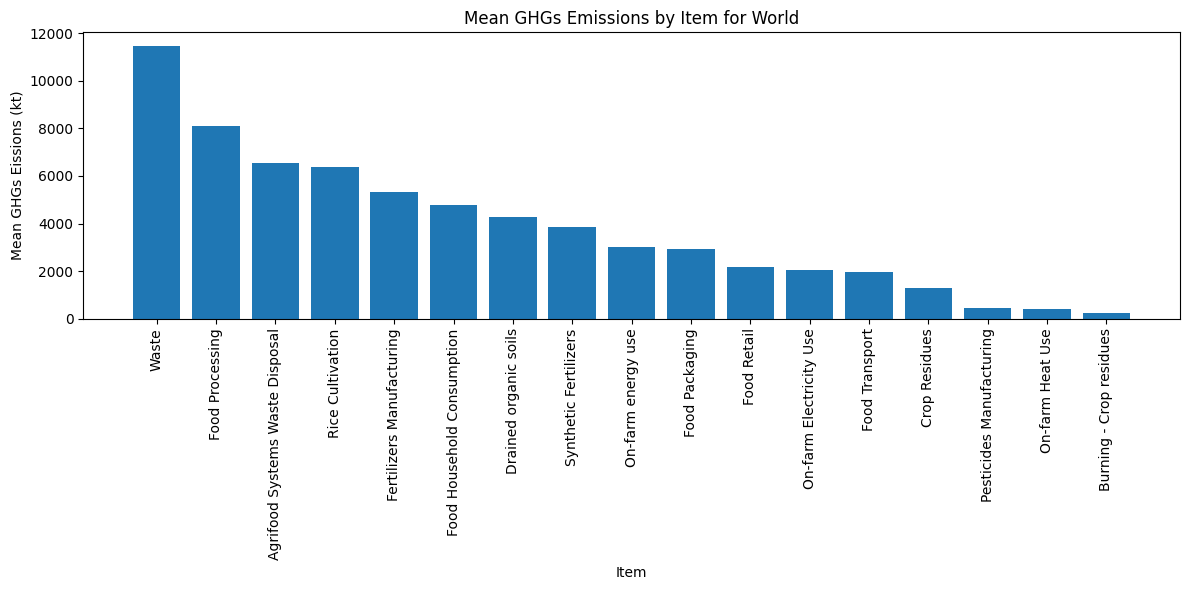

In [19]:
# Group by 'Item' and calculate the mean 'Value' for each item
mean_co2eq_by_item = filtered_df.groupby('Item')['Value'].mean().reset_index()

# Sort the data by mean CO2eq value in descending order
mean_co2eq_by_item = mean_co2eq_by_item.sort_values(by='Value', ascending=False)

# Create a bar chart to visualize the mean CO2eq for each item
plt.figure(figsize=(12, 6))
plt.bar(mean_co2eq_by_item['Item'], mean_co2eq_by_item['Value'])
plt.title('Mean GHGs Emissions by Item for World')
plt.xlabel('Item')
plt.ylabel('Mean GHGs Eissions (kt)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

###Highest GHGs Emissions by Item in Asia

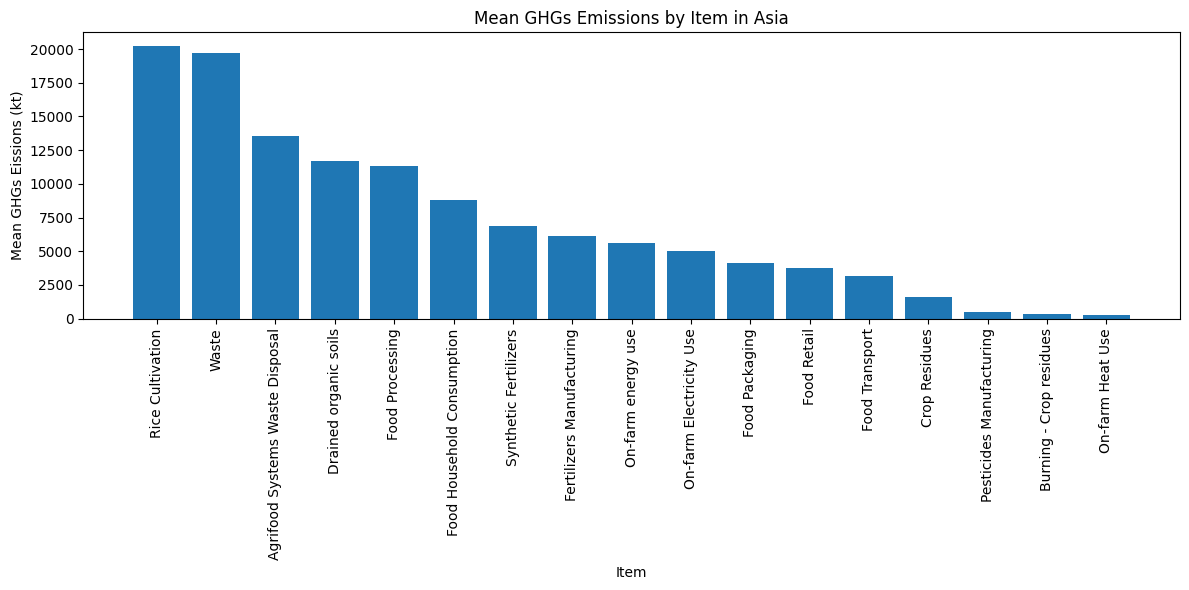

In [20]:
# Group by 'Item' and calculate the mean 'Value' for each item
mean_co2eq_by_item_asia = asia_df.groupby('Item')['Value'].mean().reset_index()

# Sort the data by mean CO2eq value in descending order
mean_co2eq_by_item_asia = mean_co2eq_by_item_asia.sort_values(by='Value', ascending=False)

# Create a bar chart to visualize the mean CO2eq for each item
plt.figure(figsize=(12, 6))
plt.bar(mean_co2eq_by_item_asia['Item'], mean_co2eq_by_item_asia['Value'])
plt.title('Mean GHGs Emissions by Item in Asia')
plt.xlabel('Item')
plt.ylabel('Mean GHGs Eissions (kt)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

####Top 10 Emission Asia Countries

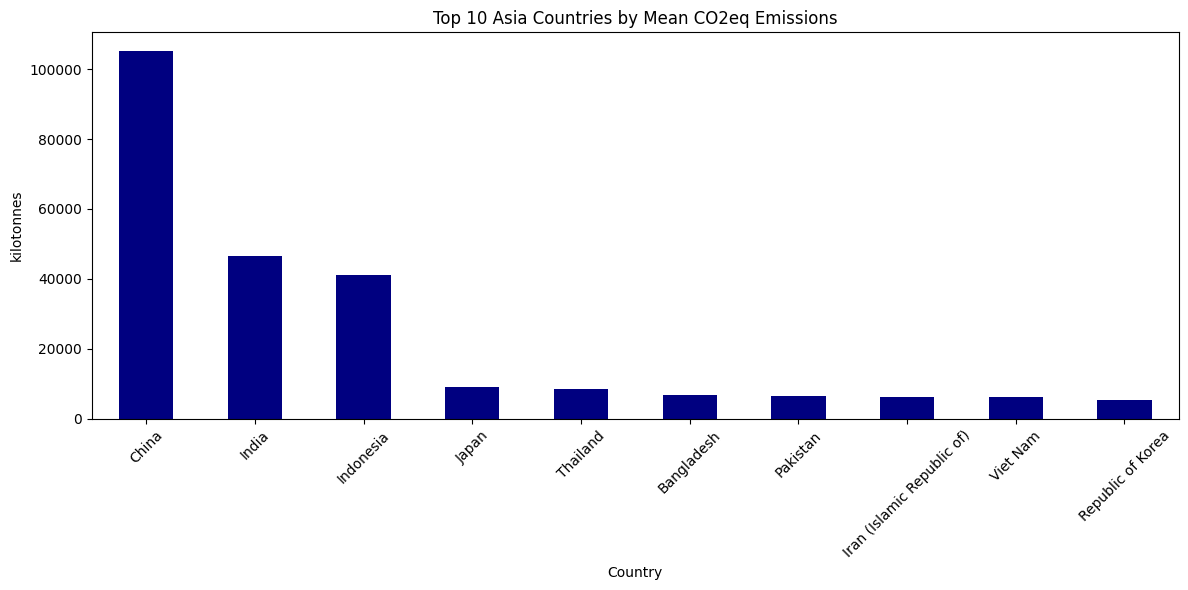

In [21]:
# Calculate the mean CO2eq emissions for each country
mean_co2eq_by_country = asia_df.groupby('Area')['Value'].mean()

# Sort the countries by mean CO2eq emissions in descending order and select the top ten
top_10_countries = mean_co2eq_by_country.sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='navy')
plt.title('Top 10 Asia Countries by Mean CO2eq Emissions')
plt.xlabel('Country')
plt.ylabel('kilotonnes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Top 10 Countries vs. Food Wastage for GHGs Emissions for Asia

<ipython-input-22-cee2482fbc43>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = top_10_countries.append(pd.Series({'Waste': mean_co2eq_by_item_asia.loc[mean_co2eq_by_item_asia['Item'] == 'Waste', 'Value'].values[0]}))


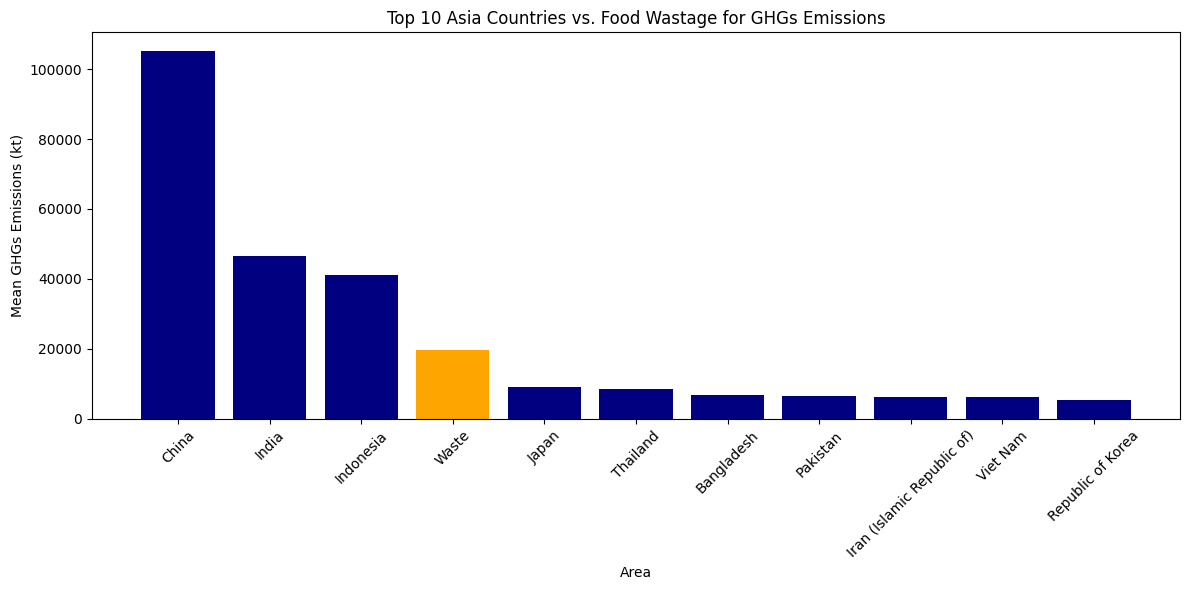

In [22]:
# Combine 'Waste' with the top 10 countries
combined_data = top_10_countries.append(pd.Series({'Waste': mean_co2eq_by_item_asia.loc[mean_co2eq_by_item_asia['Item'] == 'Waste', 'Value'].values[0]}))
combined_data = combined_data.sort_values(ascending=False).head(11)

# Define colors
colors = ['orange' if index == 'Waste' else 'navy' for index in combined_data.index]

# Create a bar chart for the combined data with different colors
plt.figure(figsize=(12, 6))
plt.bar(combined_data.index, combined_data.values, color=colors)
plt.title('Top 10 Asia Countries vs. Food Wastage for GHGs Emissions')
plt.xlabel('Area')
plt.ylabel('Mean GHGs Emissions (kt)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Historical trends for top 5 item in whole world

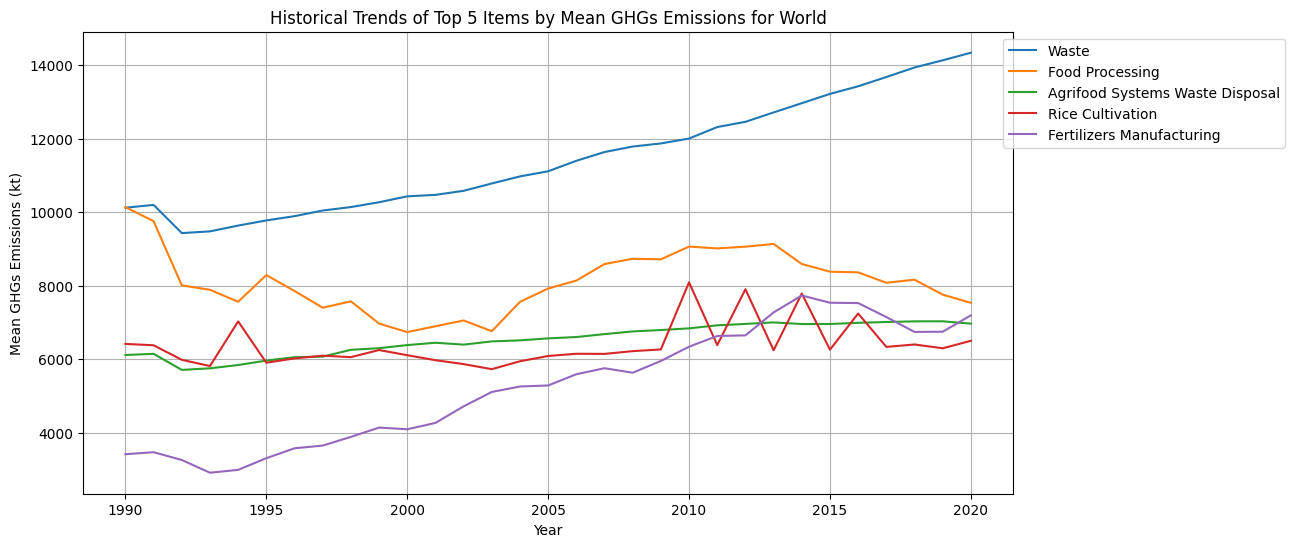

In [23]:
# Group by 'Item' and calculate the mean 'Value' for each item
mean_co2eq_by_item = filtered_df.groupby('Item')['Value'].mean().reset_index()

# Sort the items by mean CO2eq value in descending order
mean_co2eq_by_item = mean_co2eq_by_item.sort_values(by='Value', ascending=False)

# Select the top 5 items with the highest mean CO2eq values
top_5_items = mean_co2eq_by_item.head(5)

# Filter the original DataFrame to include only the top 5 items
top_5_history = filtered_df[filtered_df['Item'].isin(top_5_items['Item'])]

# Group by 'Item' and 'Year' on the filtered data and calculate the mean 'Value' for each combination
mean_co2eq_by_item_year_5 = top_5_history.groupby(['Item', 'Year'])['Value'].mean().reset_index()

# Create a line plot for each of the top 5 items
plt.figure(figsize=(12, 6))

# Loop through the top 5 items and create a line plot for each item
for item in top_5_items['Item']:
    item_data_5 = mean_co2eq_by_item_year_5[mean_co2eq_by_item_year_5['Item'] == item]
    plt.plot(item_data_5['Year'], item_data_5['Value'], label=item)

plt.title('Historical Trends of Top 5 Items by Mean GHGs Emissions for World')
plt.xlabel('Year')
plt.ylabel('Mean GHGs Emissions (kt)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

###Historical Trends of Top 5 Items in Asia

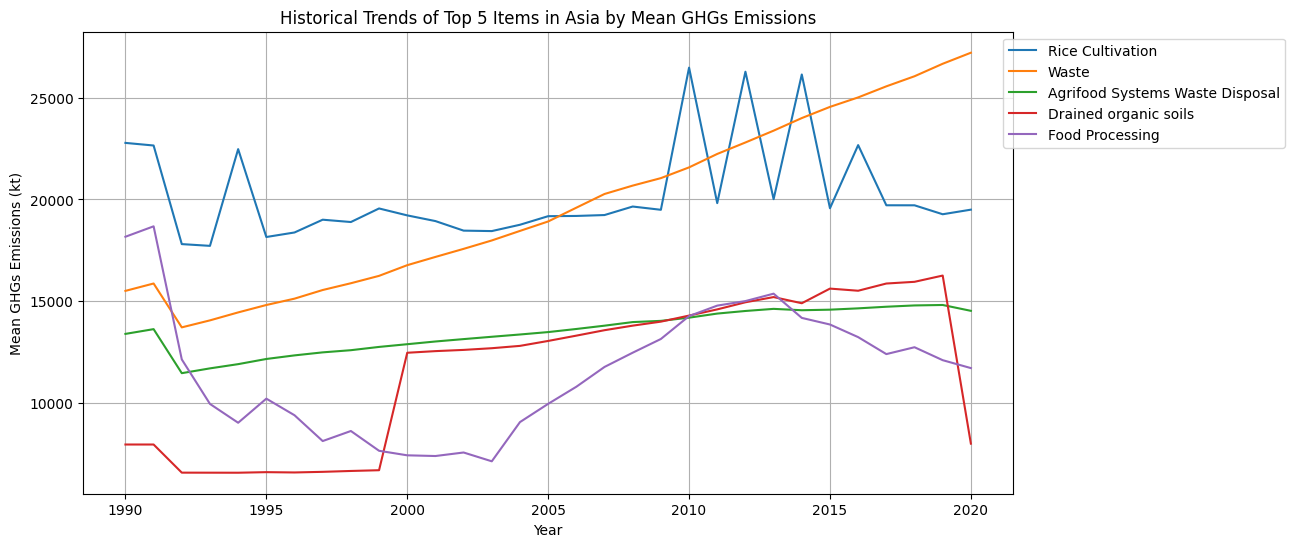

In [24]:
# Group by 'Item' and calculate the mean 'Value' for each item
mean_co2eq_by_item_asia = asia_df.groupby('Item')['Value'].mean().reset_index()

# Sort the items by mean CO2eq value in descending order
mean_co2eq_by_item_asia = mean_co2eq_by_item_asia.sort_values(by='Value', ascending=False)

# Select the top 5 items with the highest mean CO2eq values
top_5_items_asia = mean_co2eq_by_item_asia.head(5)

# Filter the original DataFrame to include only the top 5 items
top_5_history_asia = asia_df[asia_df['Item'].isin(top_5_items_asia['Item'])]

# Group by 'Item' and 'Year' on the filtered data and calculate the mean 'Value' for each combination
mean_co2eq_by_item_year_asia = top_5_history_asia.groupby(['Item', 'Year'])['Value'].mean().reset_index()

# Create a line plot for each of the top 5 items
plt.figure(figsize=(12, 6))

# Loop through the top 5 items and create a line plot for each item
for item in top_5_items_asia['Item']:
    item_asia = mean_co2eq_by_item_year_asia[mean_co2eq_by_item_year_asia['Item'] == item]
    plt.plot(item_asia['Year'], item_asia['Value'], label=item)

plt.title('Historical Trends of Top 5 Items in Asia by Mean GHGs Emissions')
plt.xlabel('Year')
plt.ylabel('Mean GHGs Emissions (kt)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

In [25]:
# Filter the DataFrame for the specified conditions
filtered_items_2019 = asia_df[(asia_df['Year'] == 2019) & (asia_df['Item'] == 'Drained organic soils')]
filtered_items_2020 = asia_df[(asia_df['Year'] == 2020) & (asia_df['Item'] == 'Drained organic soils')]
filtered_items_2000 = asia_df[(asia_df['Year'] == 2000) & (asia_df['Item'] == 'Drained organic soils')]
filtered_items_1999 = asia_df[(asia_df['Year'] == 1999) & (asia_df['Item'] == 'Drained organic soils')]
filtered_items_2010 = asia_df[(asia_df['Year'] == 2010) & (asia_df['Item'] == 'Drained organic soils')]

# Count the total number of non-zero values for each year
total_non_zero_2019 = (filtered_items_2019['Value'] != 0).sum()
total_non_zero_2000 = (filtered_items_2000['Value'] != 0).sum()
total_non_zero_1999 = (filtered_items_1999['Value'] != 0).sum()
total_non_zero_2020 = (filtered_items_2020['Value'] != 0).sum()
total_non_zero_2010 = (filtered_items_2010['Value'] != 0).sum()

print("Total non-zero values for 2019:", total_non_zero_2019)
print("Total non-zero values for 2020:", total_non_zero_2020)
print("Total non-zero values for 1999:", total_non_zero_1999)
print("Total non-zero values for 2000:", total_non_zero_2000)
print("Total non-zero values for 2010:", total_non_zero_2010)


Total non-zero values for 2019: 15
Total non-zero values for 2020: 14
Total non-zero values for 1999: 14
Total non-zero values for 2000: 15
Total non-zero values for 2010: 15


##Prediction Model

####ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

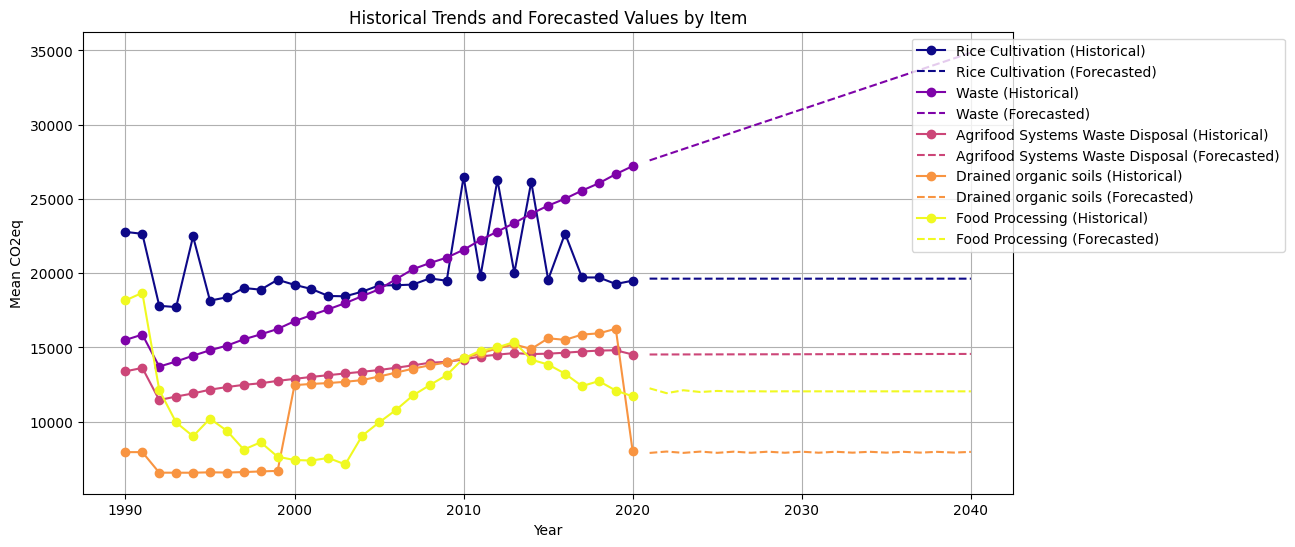

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Function to forecast future values using ARIMA
def forecast_arima(data, item):
    # Filter data for the specific item
    item_asia = data[data['Item'] == item]

    # Prepare the time series data (Year as the index and Value as the values)
    time_series = item_asia.set_index('Year')['Value']

    # Fit an ARIMA model
    model = ARIMA(time_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast future values (adjust the steps parameter as needed)
    steps = 20  # Number of future steps to predict
    forecast_values = model_fit.forecast(steps=steps)

    # Create a DataFrame for the forecasted values
    future_years = np.arange(time_series.index[-1] + 1, time_series.index[-1] + steps + 1)
    forecast_df = pd.DataFrame({'Year': future_years, 'Value': forecast_values})

    return forecast_df

# List of unique items sorted by historical values (highest to lowest)
items = mean_co2eq_by_item_year_asia.groupby('Item')['Value'].mean().sort_values(ascending=False).index

# Define the desired line colors
line_colors = ['#0d0887', '#7e03a8', '#cc4678', '#f89441', '#f0f921']

# Perform forecasting for each item and plot with specified colors
plt.figure(figsize=(12, 6))
for item, color in zip(items, line_colors):
    forecasted_df = forecast_arima(mean_co2eq_by_item_year_asia, item)
    historical_data = mean_co2eq_by_item_year_asia[mean_co2eq_by_item_year_asia['Item'] == item]
    plt.plot(historical_data['Year'], historical_data['Value'], label=f'{item} (Historical)', marker='o', color=color)
    plt.plot(forecasted_df['Year'], forecasted_df['Value'], label=f'{item} (Forecasted)', linestyle='--', color=color)

plt.title('Historical Trends and Forecasted Values by Item')
plt.xlabel('Year')
plt.ylabel('Mean CO2eq')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()


####ARIMA Accuracy

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with

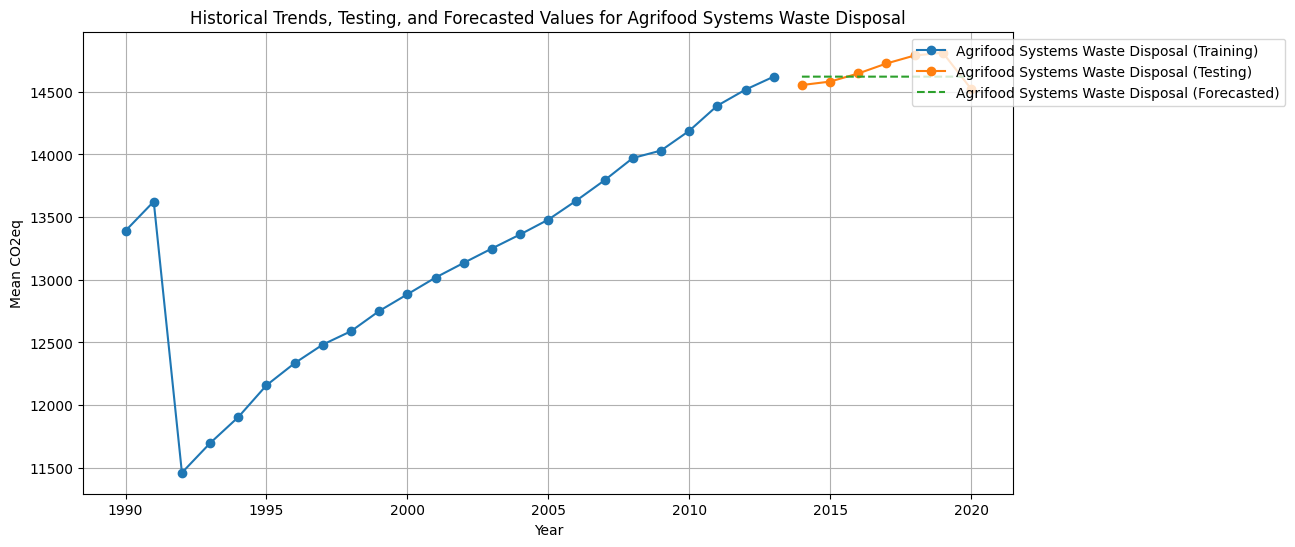

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

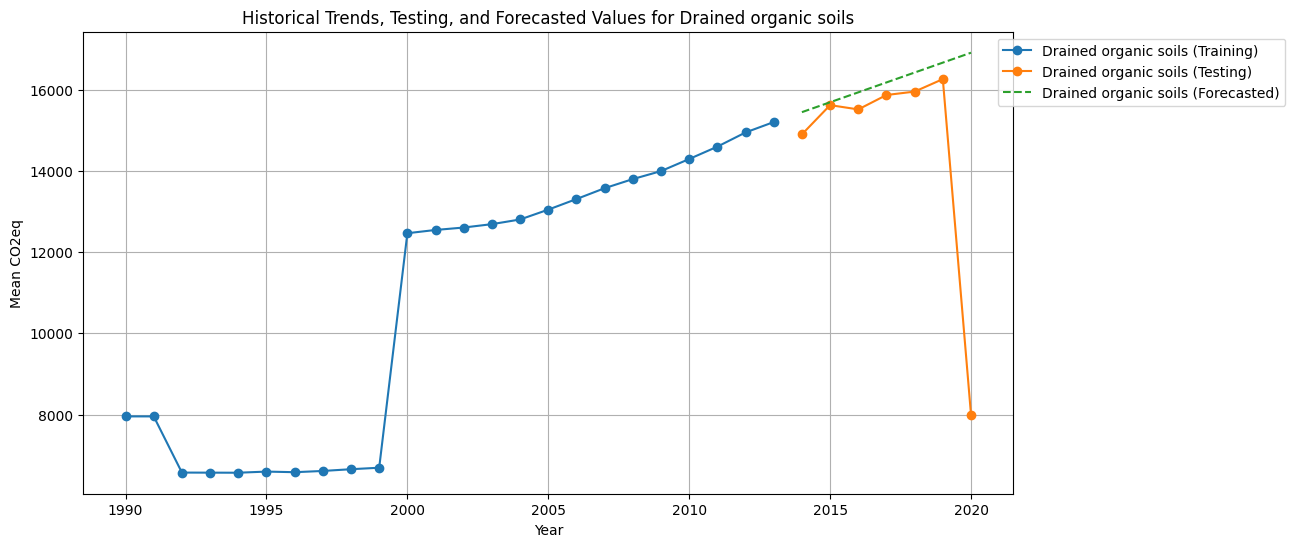

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

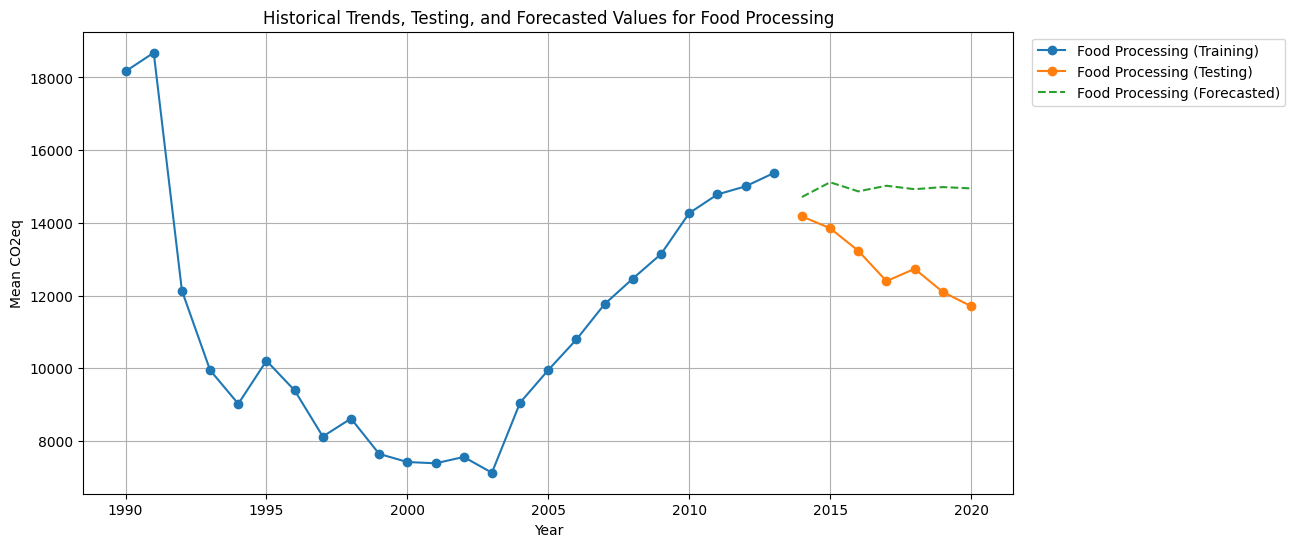

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

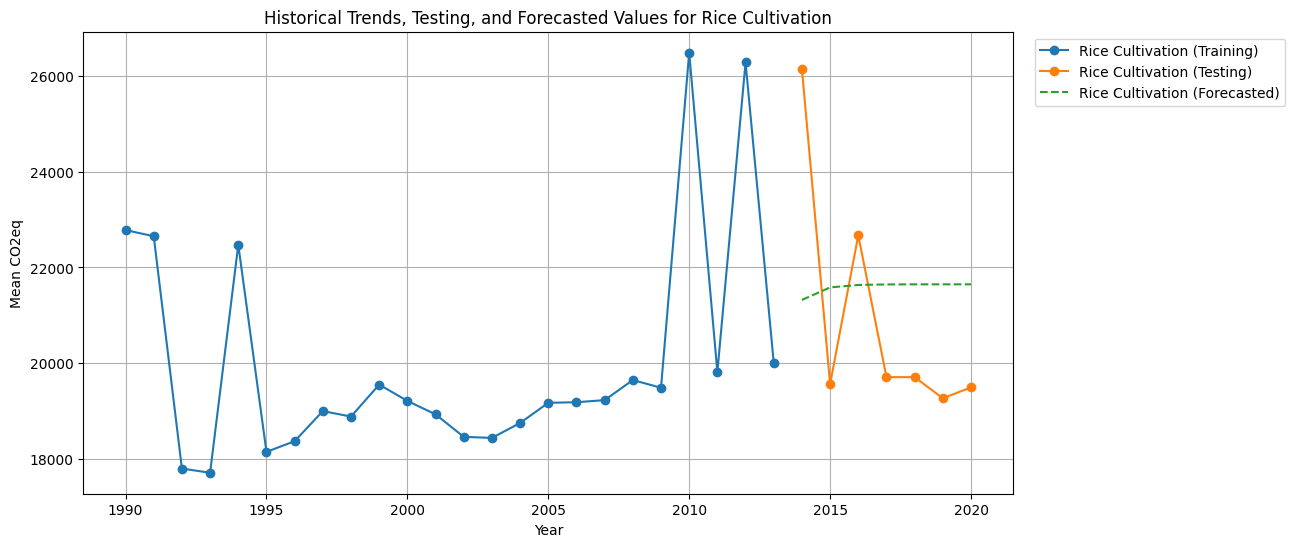

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

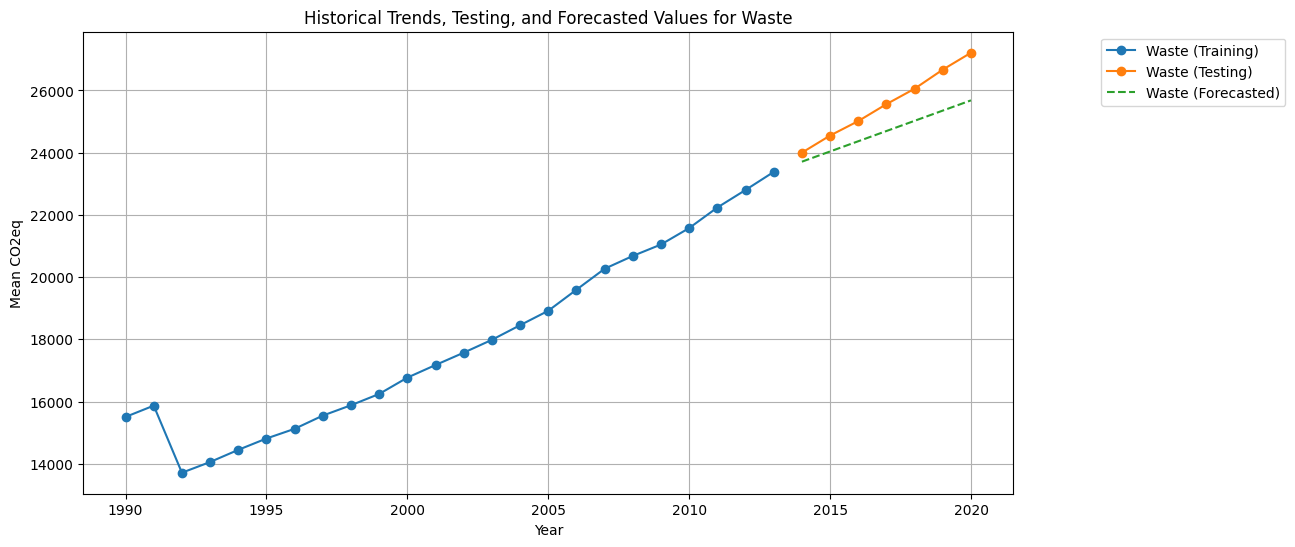

In [27]:
# Function to forecast future values using ARIMA and perform train-test split
from sklearn.model_selection import train_test_split

def forecast_arima_with_split(data, item, test_size=0.2):
    # Filter data for the specific item
    item_asia = data[data['Item'] == item]

    # Prepare the time series data (Year as the index and Value as the values)
    time_series = item_asia.set_index('Year')['Value']

    # Perform train-test split
    train_size = int(len(time_series) * (1 - test_size))
    train_data, test_data = time_series[:train_size], time_series[train_size:]

    # Fit an ARIMA model on the training data
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast future values on the test data
    steps = len(test_data)  # Number of future steps to predict (same as the length of the test set)
    forecast_values = model_fit.forecast(steps=steps)

    # Create a DataFrame for the forecasted values
    forecast_df = pd.DataFrame({'Year': test_data.index, 'Value': forecast_values})

    return train_data, test_data, forecast_df

# List of unique items
items = mean_co2eq_by_item_year_asia['Item'].unique()

# Perform forecasting and split for each item
for item in items:
    train_data, test_data, forecasted_df = forecast_arima_with_split(mean_co2eq_by_item_year_asia, item)

    # Plot the historical data, testing data, and forecasted values for each item
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data.values, label=f'{item} (Training)', marker='o')
    plt.plot(test_data.index, test_data.values, label=f'{item} (Testing)', marker='o')
    plt.plot(forecasted_df['Year'], forecasted_df['Value'], label=f'{item} (Forecasted)', linestyle='--')

    plt.title(f'Historical Trends, Testing, and Forecasted Values for {item}')
    plt.xlabel('Year')
    plt.ylabel('Mean CO2eq')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.grid(True)
    plt.show()


####Linear Regression

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


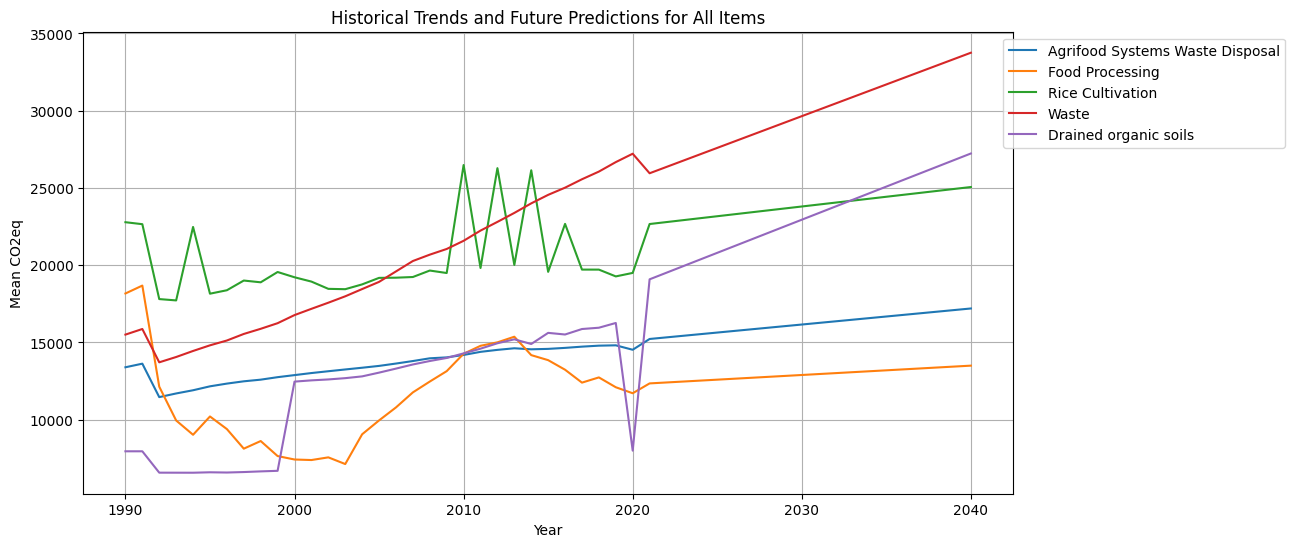

In [28]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sort the data by 'Year' for consistency
mean_co2eq_by_item_year_asia = mean_co2eq_by_item_year_asia.sort_values(by='Year')

# Split the data into training and testing sets
train_size = int(0.8 * len(mean_co2eq_by_item_year_asia))
train_data = mean_co2eq_by_item_year_asia[:train_size]
test_data = mean_co2eq_by_item_year_asia[train_size:]

# Create a linear regression model
model = LinearRegression()

# Initialize an empty DataFrame to store future predictions
future_predictions_df = pd.DataFrame(columns=['Year', 'Item', 'Value'])

# Predict future values for each item
future_years = np.arange(mean_co2eq_by_item_year_asia['Year'].max() + 1, 2041)  # Predict for years 2021 to 2030

# Loop through each unique item
for item in mean_co2eq_by_item_year_asia['Item'].unique():
    # Filter data for the current item
    item_train_data = train_data[train_data['Item'] == item]

    # Fit the model on the training data for the current item
    model.fit(item_train_data[['Year']], item_train_data['Value'])

    # Predict future values for the current item
    future_predictions = model.predict(future_years.reshape(-1, 1))

    # Create a DataFrame for future predictions for the current item
    future_df = pd.DataFrame({'Year': future_years, 'Item': item, 'Value': future_predictions})

    # Append the future predictions to the overall DataFrame
    future_predictions_df = pd.concat([future_predictions_df, future_df])

# Combine historical data and future predictions
combined_df = pd.concat([mean_co2eq_by_item_year_asia, future_predictions_df])

# Visualize the predictions for all items
plt.figure(figsize=(12, 6))

# Loop through each unique item and plot its historical and predicted data
for item in combined_df['Item'].unique():
    item_asia = combined_df[combined_df['Item'] == item]
    plt.plot(item_asia['Year'], item_asia['Value'], label=item)

plt.title('Historical Trends and Future Predictions for All Items')
plt.xlabel('Year')
plt.ylabel('Mean CO2eq')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

####Linear Regression Accuracy (Overfitting?)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


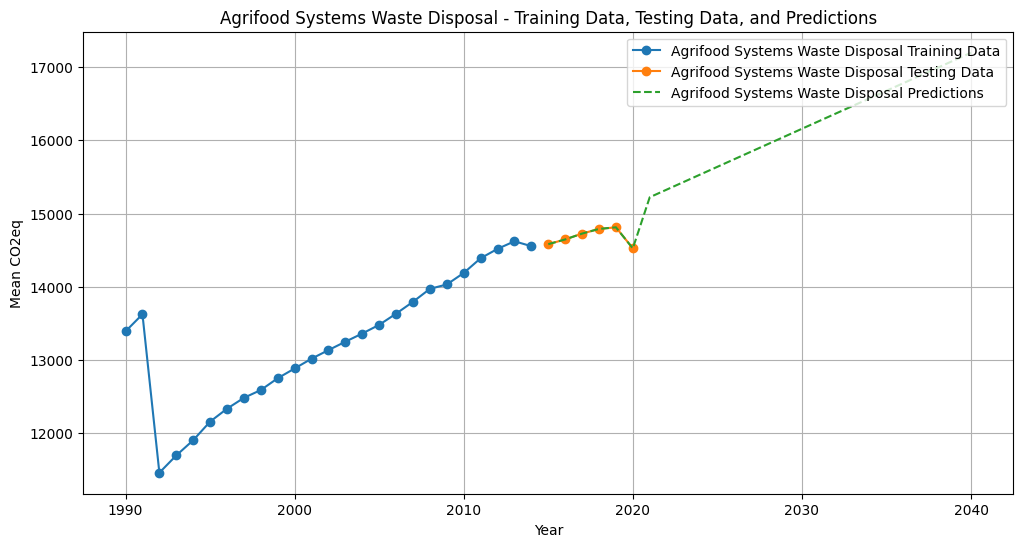

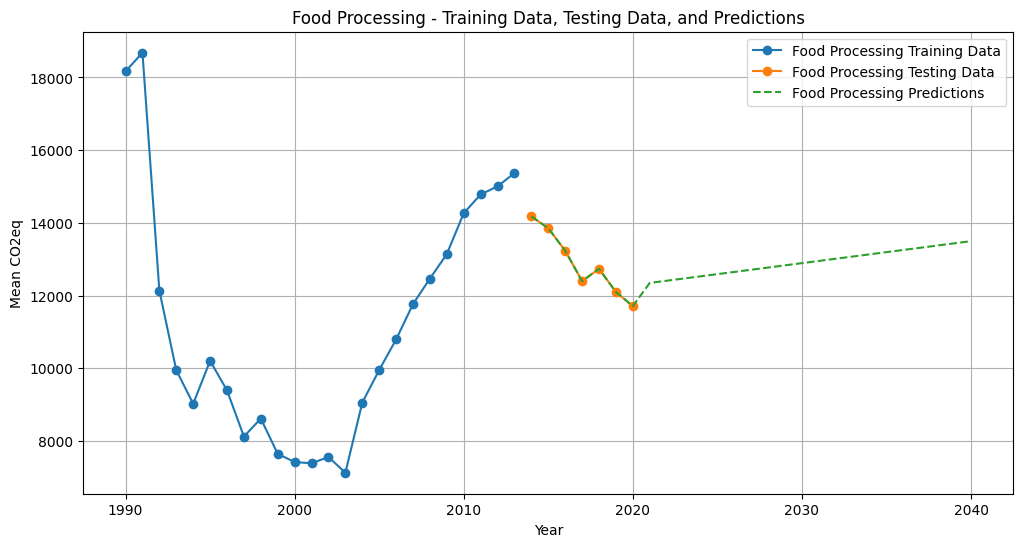

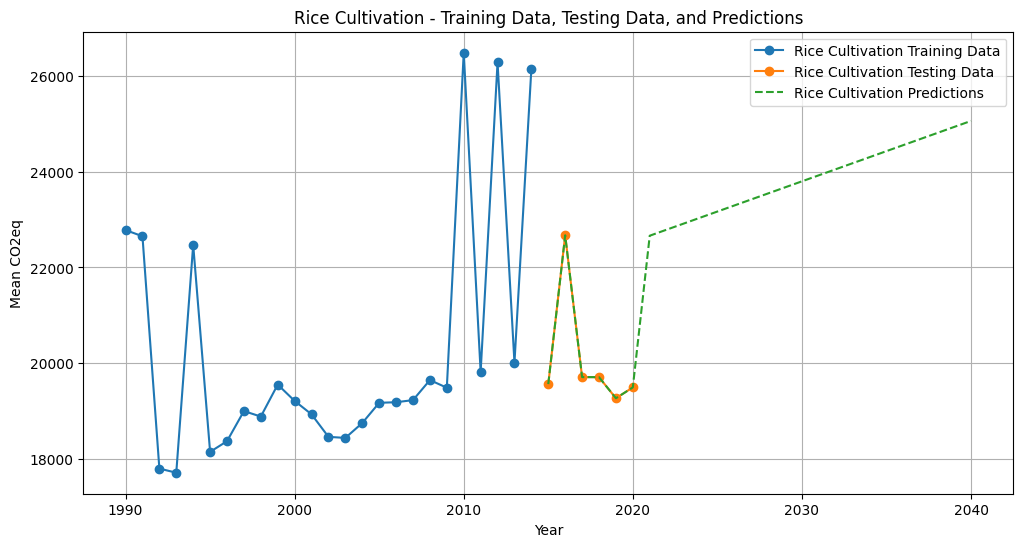

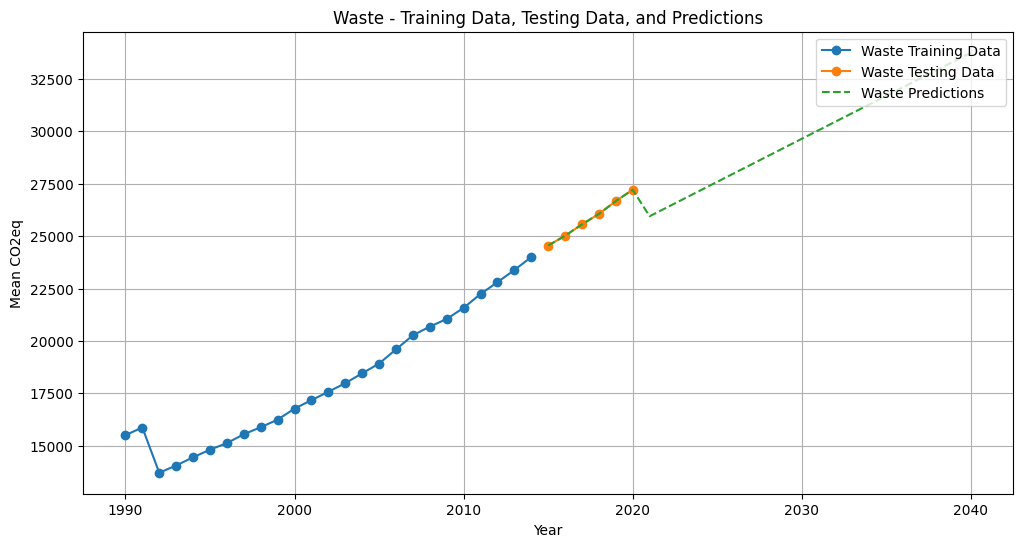

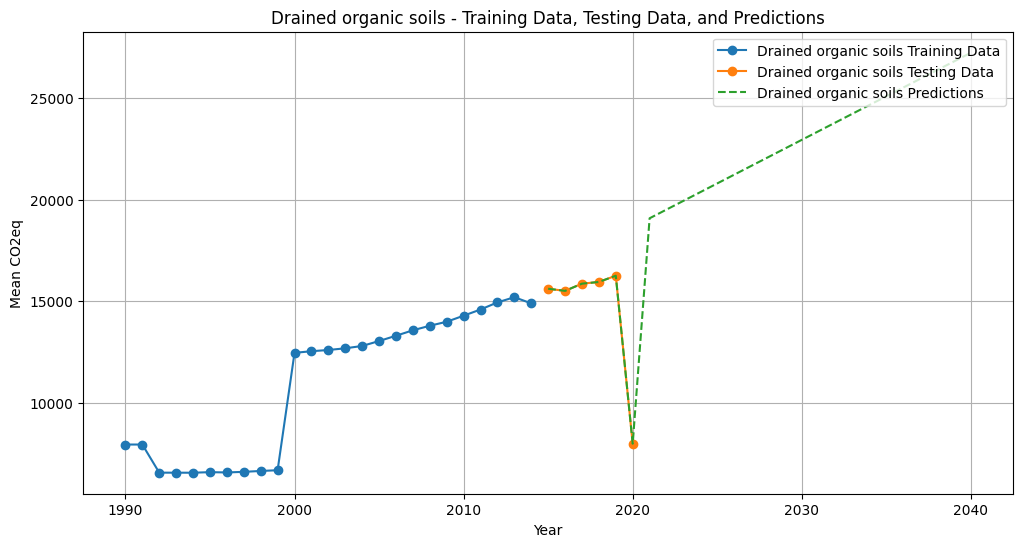

In [29]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sort the data by 'Year' for consistency
mean_co2eq_by_item_year_asia = mean_co2eq_by_item_year_asia.sort_values(by='Year')

# Split the data into training and testing sets
train_size = int(0.8 * len(mean_co2eq_by_item_year_asia))
train_data = mean_co2eq_by_item_year_asia[:train_size]
test_data = mean_co2eq_by_item_year_asia[train_size:]

# Create a linear regression model
model = LinearRegression()

# Initialize an empty DataFrame to store future predictions
future_predictions_df = pd.DataFrame(columns=['Year', 'Item', 'Value'])

# Predict future values for each item
future_years = np.arange(mean_co2eq_by_item_year_asia['Year'].max() + 1, 2041)  # Predict for years 2021 to 2030

# Initialize empty lists to store data for each item
item_validation_data = []

# Loop through each unique item
for item in mean_co2eq_by_item_year_asia['Item'].unique():
    # Filter data for the current item
    item_train_data = train_data[train_data['Item'] == item]
    item_test_data = test_data[test_data['Item'] == item]

    # Fit the model on the training data for the current item
    model.fit(item_train_data[['Year']], item_train_data['Value'])

    # Predict future values for the current item
    future_predictions = model.predict(future_years.reshape(-1, 1))

    # Create a DataFrame for future predictions for the current item
    future_df = pd.DataFrame({'Year': future_years, 'Item': item, 'Value': future_predictions})

    # Append the future predictions to the overall DataFrame
    future_predictions_df = pd.concat([future_predictions_df, future_df])

    # Append the validation data for the current item
    item_validation_data.append((item_train_data, item_test_data, item))

# Combine historical data and future predictions
combined_df = pd.concat([mean_co2eq_by_item_year_asia, future_predictions_df])

# Plot separate graphs for each item
for item_train_data, item_test_data, item in item_validation_data:
    plt.figure(figsize=(12, 6))

    # Plot training data
    plt.plot(item_train_data['Year'], item_train_data['Value'], label=f'{item} Training Data', marker='o')

    # Plot testing data
    plt.plot(item_test_data['Year'], item_test_data['Value'], label=f'{item} Testing Data', marker='o')

    # Plot predicted data
    predicted_data = combined_df[(combined_df['Item'] == item) & (combined_df['Year'] >= item_test_data['Year'].min())]
    plt.plot(predicted_data['Year'], predicted_data['Value'], label=f'{item} Predictions', linestyle='--')

    plt.title(f'{item} - Training Data, Testing Data, and Predictions')
    plt.xlabel('Year')
    plt.ylabel('Mean CO2eq')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you already have the model and test_data from the previous code

# Make predictions on the test data
test_predictions = model.predict(test_data[['Year']])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['Value'], test_predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['Value'], test_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 4244.939763299167
Mean Squared Error (MSE): 25905629.44618392
Root Mean Squared Error (RMSE): 5089.757307198834


####Tune Linear Regression

In [31]:
from sklearn.linear_model import RidgeCV

# Create a RidgeCV model with a list of alpha values to search
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
model = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the model on the training data
model.fit(train_data[['Year']], train_data['Value'])

# Get the best alpha value from cross-validation
best_alpha = model.alpha_
print(f'Best Alpha: {best_alpha}')

# Make predictions on the test data
test_predictions = model.predict(test_data[['Year']])

# Evaluate the model (calculate MAE, MSE, RMSE)
mae = mean_absolute_error(test_data['Value'], test_predictions)
mse = mean_squared_error(test_data['Value'], test_predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Best Alpha: 10.0
Mean Absolute Error (MAE): 4465.916477000974
Mean Squared Error (MSE): 26351650.047949076
Root Mean Squared Error (RMSE): 5133.385826912787


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


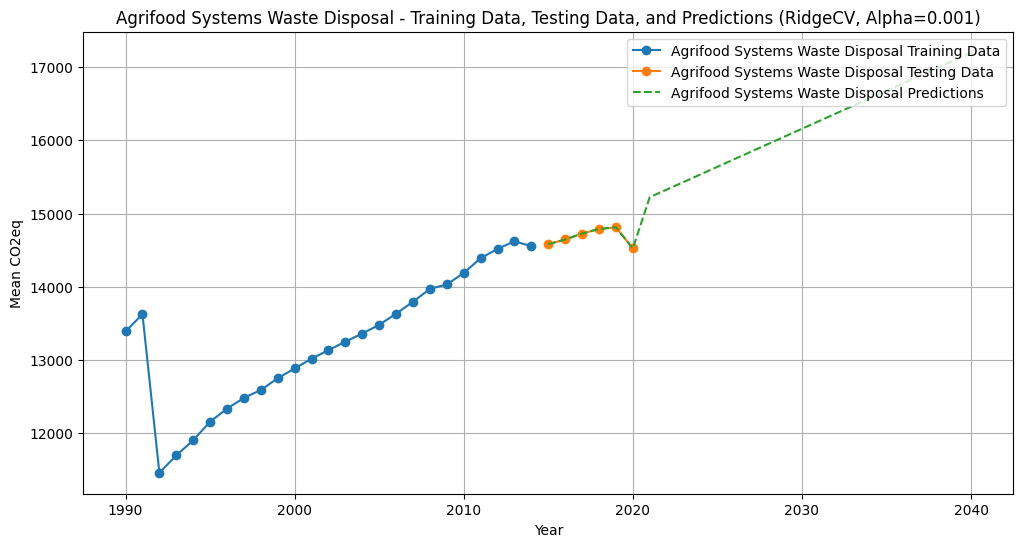

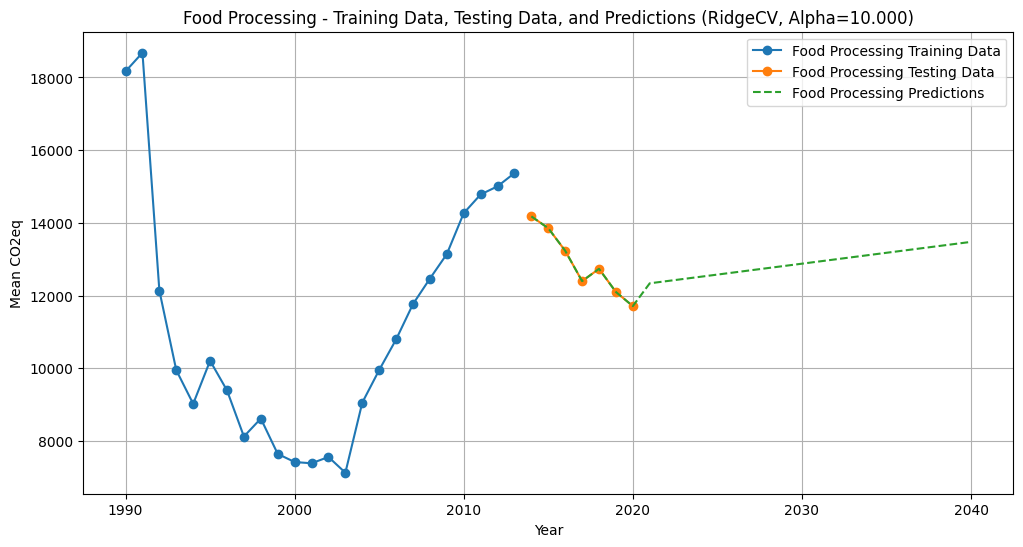

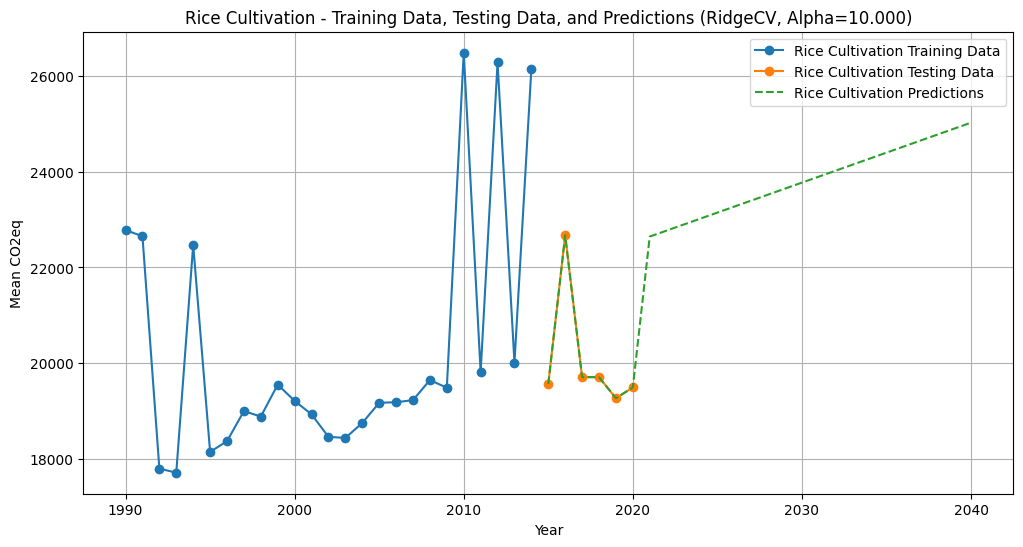

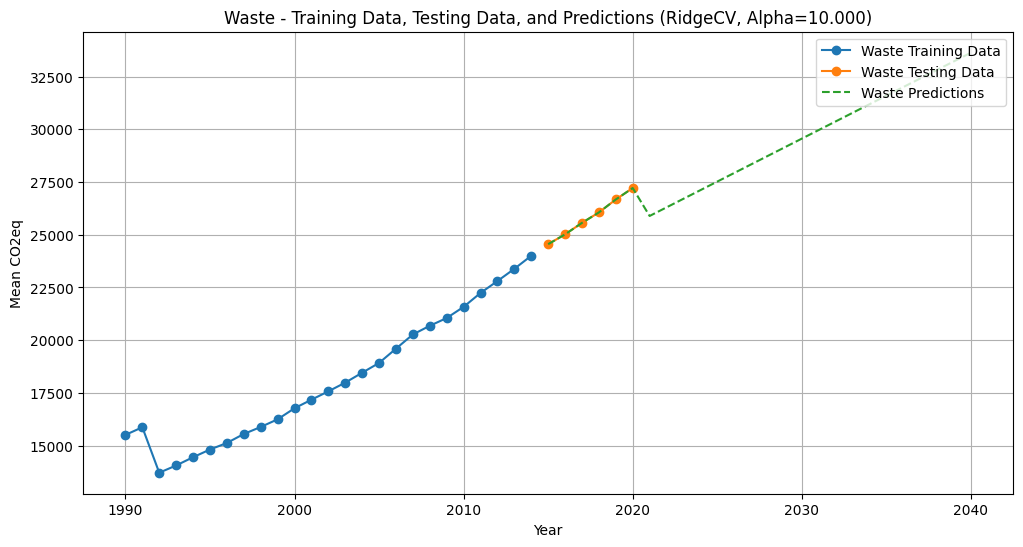

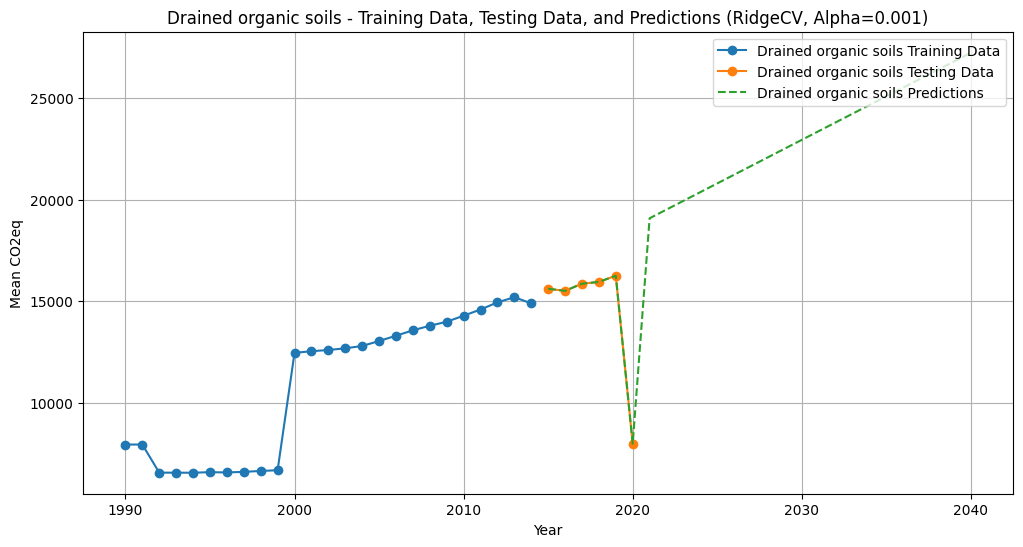

In [32]:
from sklearn.linear_model import RidgeCV

# Create a RidgeCV model with a list of alpha values to search
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
model = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Initialize an empty DataFrame to store future predictions
future_predictions_df = pd.DataFrame(columns=['Year', 'Item', 'Value'])

# Predict future values for each item
future_years = np.arange(mean_co2eq_by_item_year_asia['Year'].max() + 1, 2041)  # Predict for years 2021 to 2030

# Initialize empty lists to store data for each item
item_validation_data = []

# Loop through each unique item
for item in mean_co2eq_by_item_year_asia['Item'].unique():
    # Filter data for the current item
    item_train_data = train_data[train_data['Item'] == item]
    item_test_data = test_data[test_data['Item'] == item]

    # Fit the RidgeCV model on the training data for the current item
    model.fit(item_train_data[['Year']], item_train_data['Value'])

    # Get the best alpha value from cross-validation
    best_alpha = model.alpha_

    # Predict future values for the current item using the best alpha
    future_predictions = model.predict(future_years.reshape(-1, 1))

    # Create a DataFrame for future predictions for the current item
    future_df = pd.DataFrame({'Year': future_years, 'Item': item, 'Value': future_predictions})

    # Append the future predictions to the overall DataFrame
    future_predictions_df = pd.concat([future_predictions_df, future_df])

    # Append the validation data for the current item
    item_validation_data.append((item_train_data, item_test_data, item, best_alpha))

# Combine historical data and future predictions
combined_df = pd.concat([mean_co2eq_by_item_year_asia, future_predictions_df])

# Plot separate graphs for each item with RidgeCV model
for item_train_data, item_test_data, item, best_alpha in item_validation_data:
    plt.figure(figsize=(12, 6))

    # Plot training data
    plt.plot(item_train_data['Year'], item_train_data['Value'], label=f'{item} Training Data', marker='o')

    # Plot testing data
    plt.plot(item_test_data['Year'], item_test_data['Value'], label=f'{item} Testing Data', marker='o')

    # Plot predicted data
    predicted_data = combined_df[(combined_df['Item'] == item) & (combined_df['Year'] >= item_test_data['Year'].min())]
    plt.plot(predicted_data['Year'], predicted_data['Value'], label=f'{item} Predictions', linestyle='--')

    plt.title(f'{item} - Training Data, Testing Data, and Predictions (RidgeCV, Alpha={best_alpha:.3f})')
    plt.xlabel('Year')
    plt.ylabel('Mean CO2eq')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


Best Alpha: 10.0
Mean Absolute Error (MAE): 4465.916477000974
Mean Squared Error (MSE): 26351650.047949076
Root Mean Squared Error (RMSE): 5133.385826912787


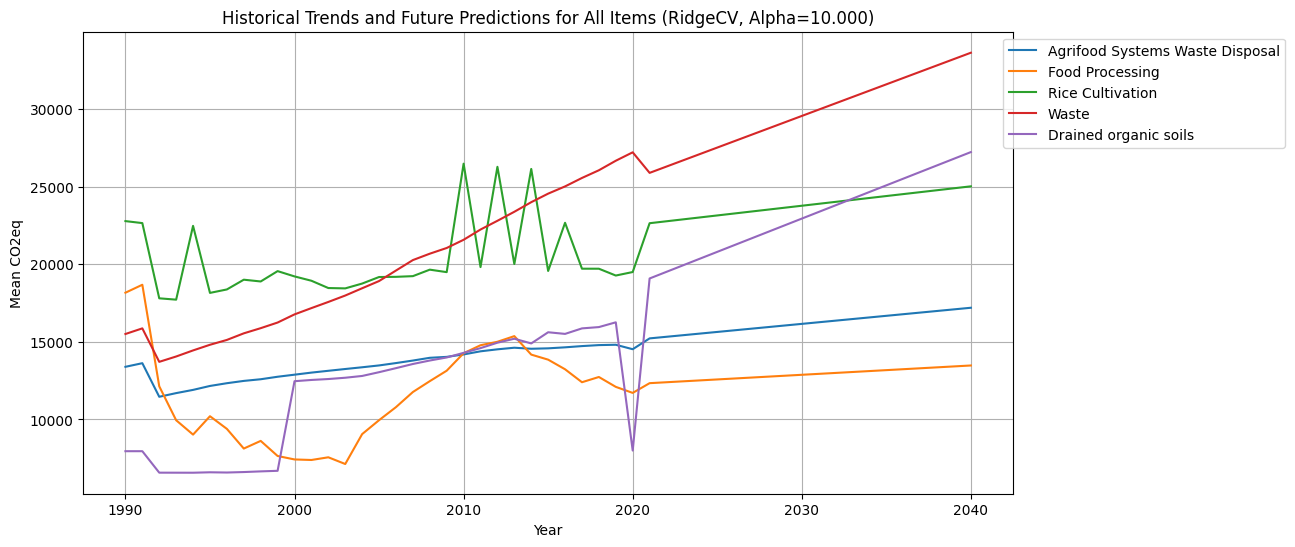

In [33]:
from sklearn.linear_model import RidgeCV

# Create a RidgeCV model with a list of alpha values to search
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
model = RidgeCV(alphas=alphas, cv=5)  # 5-fold cross-validation

# Fit the model on the training data
model.fit(train_data[['Year']], train_data['Value'])

# Get the best alpha value from cross-validation
best_alpha = model.alpha_
print(f'Best Alpha: {best_alpha}')

# Make predictions on the test data
test_predictions = model.predict(test_data[['Year']])

# Evaluate the model (calculate MAE, MSE, RMSE)
mae = mean_absolute_error(test_data['Value'], test_predictions)
mse = mean_squared_error(test_data['Value'], test_predictions)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize the predictions for all items with RidgeCV model
plt.figure(figsize=(12, 6))

# Loop through each unique item and plot its historical and predicted data
for item in combined_df['Item'].unique():
    item_asia = combined_df[combined_df['Item'] == item]
    plt.plot(item_asia['Year'], item_asia['Value'], label=f'{item}')

plt.title(f'Historical Trends and Future Predictions for All Items (RidgeCV, Alpha={best_alpha:.3f})')
plt.xlabel('Year')
plt.ylabel('Mean CO2eq')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()
